In [75]:
from dotenv import load_dotenv

load_dotenv()

True

In [76]:
from langchain_ollama import ChatOllama


llm = ChatOllama(model="llama3.2")

In [77]:
# State
from langgraph.graph import MessagesState

class State(MessagesState):
  summary: str
  

In [78]:
# Node
from langchain_core.messages import SystemMessage, RemoveMessage, HumanMessage

def conversation_llm(state):
  if state.get('summary'):
    sys_msg = f"The previous conversation summary: {state['summary']}"
    conv_messages = [SystemMessage(content=sys_msg)] + state['messages']
  else:
    conv_messages = state['messages']
    
  res = llm.invoke(conv_messages)
  print(res)
  
  return {
    "messages": res
  }
  
def summary_llm(state):
  summary = state.get("summary", "")
  if summary:
    summary_message = (
      f"This is summary of the conversation to date: {summary}\n\n"
      "Extend the summary by taking into account the new messages above"
    )
  else:
    summary_message = "Create a summary of the conversation above:"
  
  messages = state['messages'] + [HumanMessage(content=summary_message)]
  summary = llm.invoke(messages)
  
  return {
    "messages": [RemoveMessage(id=m.id) for m in state['messages'][:-2]],
    'summary': summary.content
  }

In [79]:
# edge
from typing import Literal

def summarize_conditional(state) -> Literal["__end__", "summary_llm"]:
  if len(state['messages']) > 5:
    return "summary_llm"
  else:
    return "__end__"

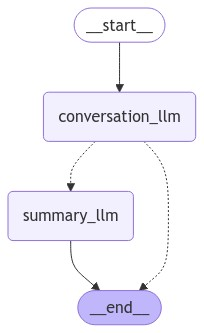

In [80]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

builder = StateGraph(State)
builder.add_node("conversation_llm", conversation_llm)
builder.add_node("summary_llm", summary_llm)

builder.add_edge(START, "conversation_llm")
builder.add_conditional_edges("conversation_llm", summarize_conditional)
builder.add_edge("summary_llm", END)

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))


In [89]:
from langchain_core.messages import HumanMessage, AIMessage

config = {
  "configurable": {"thread_id": 1}
}

msg = "yes let's do that"
state = {
  "messages": [
    HumanMessage(content=msg)
    ]
}

graph.invoke(state, config)

content="Let's talk about integrating LangGraph with external tools.\n\nAs I mentioned earlier, LangGraph is a pre-trained language model specifically designed for processing and analyzing financial data. To integrate it with external tools like Quicken or Personal Capital, you'll need to use APIs (Application Programming Interfaces) or web scraping techniques.\n\nHere are some possible approaches:\n\n1. **API Integration**: Many financial services provide APIs that allow developers to access their data programmatically. For example, Quicken has an API that allows developers to retrieve user data and transaction information. You can integrate LangGraph with these APIs using standard HTTP requests.\n2. **Web Scraping**: Web scraping involves extracting data from websites using automated tools. While not recommended by Quicken or Personal Capital (as it's against their terms of service), you can use web scraping techniques to extract financial data from public websites, such as news arti

{'messages': [HumanMessage(content="yes let's do that", additional_kwargs={}, response_metadata={}, id='11dbf3a8-4005-4442-ba14-2330fd0aa12d'),
  AIMessage(content="Let's talk about integrating LangGraph with external tools.\n\nAs I mentioned earlier, LangGraph is a pre-trained language model specifically designed for processing and analyzing financial data. To integrate it with external tools like Quicken or Personal Capital, you'll need to use APIs (Application Programming Interfaces) or web scraping techniques.\n\nHere are some possible approaches:\n\n1. **API Integration**: Many financial services provide APIs that allow developers to access their data programmatically. For example, Quicken has an API that allows developers to retrieve user data and transaction information. You can integrate LangGraph with these APIs using standard HTTP requests.\n2. **Web Scraping**: Web scraping involves extracting data from websites using automated tools. While not recommended by Quicken or Pers